# Classification Practice
## 과제 안내 
- 답안을 작성하여 ipynb 파일로 구글 드라이브 \[Assignment\] - \[개인 폴더\]로 업로드하시면 됩니다.  
- 출력 예시는 각 셀 하단에 수록되어 있습니다.
- 출력 결과와 예시가 완전히 일치할 필요는 없습니다! 문제의 조건에만 부합하면 됩니다.

# Practice Introduction
이번 시간에는 붓꽃(IRIS)의 측정 데이터를 활용하여 새로 채집한 붓꽃이 어떤 품종인지 예측할 수 있는 모델을 제작해봅니다.  

과정은 아래와 같습니다.  
1. 데이터셋 불러오기 및 확인: 붓꽃 데이터셋을 불러오고, 데이터셋의 구조를 파악합니다.  
2. 데이터셋 분할: 모델 학습을 위해 불러온 데이터셋을 train data와 validation data로 분할합니다.  
3. 모델 학습: 앞서 분할한 데이터를 이용해 모델을 학습시킵니다.  
4. 모델 평가: 모델이 올바르게 학습하였는지, 평가해 봅시다.  



# Practice

## P.4-1 데이터셋 불러오기
분류의 대표적인 문제로 "붓꽃의 품종 분류"가 있습니다.  
위 문제의 목표는 붓꽃의 측정 데이터를 이용해 새로 채집한 붓꽃이 어떤 품종인지
예측하여야 합니다.



붓꽃 문제의 데이터셋은 scikit-learn의 datasets 모듈에 포함되어 있습니다. 본 데이터셋을 불러오겠습니다. 

> 붓꽃 이외에도 숫자 손글씨, 당뇨병 등 여러 데이터가 있으니 [링크](https://scikit-learn.org/stable/datasets/index.html)에서 한번 확인해보세요!

In [53]:
from sklearn.datasets import load_iris #import IRIS datasets
iris_dataset = load_iris()
print('--------keys----------')
print(iris_dataset.keys())

--------keys----------
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


## P.4-1-1
- DESCR key에는 데이터셋의 설명이 담겨있습니다. 이를 출력하여 데이터셋 설명을 확인해 봅시다.

In [54]:
### P.4-1-1

###

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### P.4-1-1 Comment
본 데이터셋에는 꽃받침의 길이, 너비 정보와 꽃잎의 길이, 너비 정보가 주어집니다.  
 그리고 Setosa, Versicolor, Virginica 3종류의 꽃이 Labeling 되어 있습니다.

## P.4-1-2  
- 본 데이터셋의 target과 target name을 출력해봅시다.

In [55]:
### P.4-1-2

###

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


## P.4-TIPS-1
모델을 만들기 전에 어떤 모델이 적합할지, 주어진 데이터가 유효한지, 누락된 값은 없는지 등등 데이터를 분석하고 전처리하는 과정이 필요합니다.  
하지만 이번 Practice에서는 본 과정을 생략하겠습니다.  
대신 산점도 행렬(Scatter matrix)을 이용하여 데이터셋의 feature들을 시각화하여 데이터를 살펴보겠습니다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C62C824D08>,
      dtype=object)

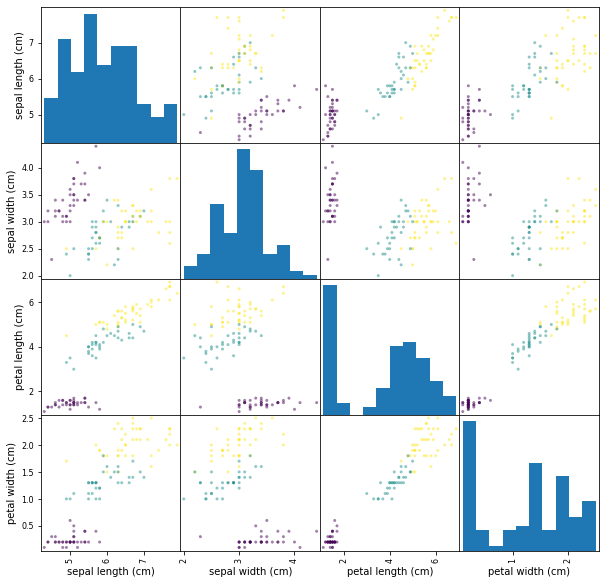

In [56]:
import pandas as pd
iris_df = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y_train, figsize=(10, 10))

## P.4-TIPS-1-Comment
시각화 결과 품종별로 feature가 잘 구분되는 것을 확인할 수 있습니다.  
이제 이 feature 들을 이용하여 모델을 학습시켜 봅시다. 

## P.4-2
본격적으로 머신러닝 모델을 만들기 전에 데이터셋을 **train data**와 **valiadation data**로 나누어야 합니다.
train/validation/test 데이터가 무엇인지는 [링크](https://lsjsj92.tistory.com/545)를 참고해주세요.


Scikit-learn의 train_test_split 함수를 사용하면 편하게 데이터셋을 분할할 수 있습니다.  

- iris_dataset을 x_train, x_test, y_train, y_test로 나누어봅시다.



In [23]:
from sklearn.model_selection import train_test_split
### P.4-2

###
print("x_train-------")
print(x_train[:5])
print("x_test-------")
print(x_test[:5])
print("y_train-------")
print(y_train[:5])
print("y_test-------")
print(y_test[:5])

x_train-------
[[5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]]
x_test-------
[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]
y_train-------
[1 1 2 0 2]
y_test-------
[2 1 0 2 0]


## P.4-3-1
Logistic Regression를 이용하여 예측 모델을 제작해 봅시다.
- logistic_clf의 이름으로 Logistic Regression 모델을 생성해봅시다.

In [58]:
from sklearn.linear_model import LogisticRegression
### P.4-3-1

###
logistic_clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## P.4-3-2
- train 데이터를 이용하여 logistic_clf 모델을 학습시켜 봅시다. 

In [61]:
### P.4-3-2

###

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## P.4-3-3
모델의 학습이 잘 진행되었을까요?  한번 간단하게 확인해봅시다!
우선 모델이 첫번째 test 데이터를 어떻게 분류하는지 확인해봅시다.
- 첫번째 test 데이터의 품종 분류(예측) 결과를 y_pred_example에 저장합니다.
- 첫번째 test 데이터의 실제 품종을 y_ans_example에 저장합니다.


In [123]:
### P.4-3-3

###

Prediction:  2
Answer:  2


## P.4-3-4  
위 과정에서 모델이 붓꽃 품종을 올바르게 분류하였나요?  
이번에는 모델의 정확도로 알아봅시다! 정확도는 전체 예측 건수에서 정답인 건수의 비율입니다.  
scikit-learn에서는 score 함수로 간단하게 정확도를 알 수 있습니다.  
logistic_clf의 정확도를 logistic_score에 저장해봅시다 

In [120]:
### P.4-3-4

###
print("Accuracy: ", logistic_score)

Accuracy:  0.868421052631579


## P.4-TIPS-2
머신러닝 과정에 있어서 모델의 평가는 모델의 학습만큼이나 매우 중요합니다.  
모델의 평가를 통해 이 모델이 적절한지, 모델의 학습이 잘 이루어졌는지, hyperparameter를 어떻게 조정할지 등등을 결정할 수 있습니다.  
하지만 정확도(Accuracy)만으로 모델을 평가할 수는 없습니다. 그 이유는 무엇일까요? 
- [링크](https://velog.io/@skyepodium/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%ED%8F%89%EA%B0%80-%EB%B0%A9%EB%B2%95)에서 모델을 평가하는 지표인 accuracy, precision, f1 score 등에 대해서 알아봅시다. 
- 또한 [링크](https://m.blog.naver.com/PostView.nhn?blogId=ckdgus1433&logNo=221599517834&proxyReferer=https:%2F%2Fwww.google.com%2F)에서 모델 평가에 사용되는 기법인 교차 검증(Cross-Validation)에 대해서도 알아봅시다.





## P.4-3-5
- 앞서 만든 logistic_clf 모델에 대해서 5번의 k-fold 교차검증을 시행하고, 각 단계에서의 accuracy를 출력하여 봅시다.
- 각 단계에서의 accuracy의 평균을 출력하여 봅시다. 

In [114]:
### P.4-3-5

###

[0.95833333 0.91304348 0.90909091 0.90909091 0.95238095]
0.9283879164313946


## P.4-3-6   
logistic_clf 모델의 혼동 행렬(confusion Matrix)를 그려봅시다.  
혼돈 행렬에 대한 설명은 (링크)[https://m.blog.naver.com/kmkim1222/220106232149]를 참고해주세요.  
더불어 seaborn의 heatmap을 이용하여 보기 좋게 시각화하여 봅시다!

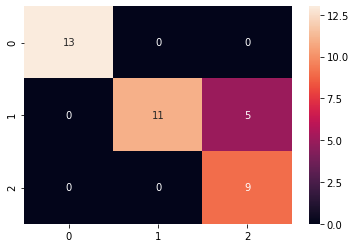

In [117]:
### P.4-3-6

### P.4-3-6

## P.4-3-7
- logistic_clf 모델의 accuracy, precision, recall, f1 score를 구해 봅시다. 이때 macro average를 이용합니다.

macro average와 micro average 설명은 [링크](https://unlimitedpower.tistory.com/entry/IR-%EB%A7%88%EC%9D%B4%ED%81%AC%EB%A1%9C-%ED%8F%89%EA%B7%A0Micro-average-%EB%A7%A4%ED%81%AC%EB%A1%9C-%ED%8F%89%EA%B7%A0Macro-average-%EC%9D%B4%EB%9E%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B0%80)를 참고해주세요.

In [119]:
### P.4-3-7

###
print("accuracy_score: ", acc_score)
print("precision_score: ", prec_score)
print("recall_score: ", rec_score)
print("f1_score: ", f1_score)

accuracy_score:  0.868421052631579
precision_score:  0.8809523809523809
recall_score:  0.8958333333333334
f1_score:  0.8658078368223295


## P.4-4
- 앞서 배운 분류 알고리즘 SVM, Decision Tree, KNN에 대해서도 위 모델 학습/평가 과정을 시행해봅시다.
- 붓꽃 분류 문제에서는 어떤 모델이 가장 적합할까요? 한번 찾아봅시다! 